# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#View first ten rows of each dataframe
#print(mouse_metadata.head(10))
#print(study_results.head(10))

# Check if the file is a DataFrame
#def is_dataframe(study_results):
#    return isinstance(study_results, pd.DataFrame) 
#print(is_dataframe(study_results))

#Ask for the count of unique values in the 'Mouse ID'column

#Check number of unique Mouse ID in each file
#unique_count = study_results['Mouse ID'].nunique()
#unique_count = mouse_metadata['Mouse ID'].nunique()
#unique_count

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results,mouse_metadata, on='Mouse ID')

# Display the data table for preview
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
unique_count = merged_df['Mouse ID'].nunique()
unique_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# https://bootcampspot.instructure.com/courses/4981/external_tools/313

#Identify duplicate records
duplicate_records = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Return only Mouse ID for the duplicates
mouseid_duplicates = duplicate_records['Mouse ID']

# Print the resulting column1 duplicates
print(mouseid_duplicates)

860    g989
861    g989
862    g989
863    g989
864    g989
865    g989
866    g989
867    g989
868    g989
869    g989
Name: Mouse ID, dtype: object


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_records = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_records

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# https://bootcampspot.instructure.com/courses/4981/external_tools/313
# Use the drop_duplicates() method to remove duplicate rows based on specific columns

# Initialize DataFrame
deduped_merged_df = merged_df

# Deduplicate the DataFrame based on specific columns
deduped_merged_df = deduped_merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

# Print the deduplicated DataFrame
print(deduped_merged_df)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        b128          5           45.651331                 0    Capomulin   
2        b128         10           43.270852                 0    Capomulin   
3        b128         15           43.784893                 0    Capomulin   
4        b128         20           42.731552                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
1888     m601         25           33.118756                 1    Capomulin   
1889     m601         30           31.758275                 1    Capomulin   
1890     m601         35           30.834357                 1    Capomulin   
1891     m601         40           31.378045                 1    Capomulin   
1892     m601         45           28.430964                 1    Capomulin   

         Sex  Age_months  Weight (g)  
0     Female

In [6]:
print(type(deduped_merged_df) == pd.DataFrame)  # Output: True

True


In [7]:
# Checking the number of mice in the clean DataFrame.
unique_count = deduped_merged_df['Mouse ID'].nunique()
unique_count

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
#of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each 
#drug regimen: mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#1) Group by 'Drug Regimen' and ask for the mean
#2) Group by 'Drug Regimen' and ask for the median
#3) Group by 'Drug Regimen' and ask for the variance
#4) Group by 'Drug Regimen' and ask for the Std. Dev.
#5) Group by 'Drug Regimen' ans ask for the Std. Err. 

mean_tumor = deduped_merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor = deduped_merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_tumor = deduped_merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_tumor = deduped_merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor = deduped_merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
sem_tumor

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [9]:
#Give mean_tumor, median_tumor, var_tumor, std_tumor, and sem_tumor
#header rows before merging them into a single dataframe
#To put a header on the output columns, convert the output from series
#to DataFrames with the to_frame() function. Set a column name for each conversion.
#https://bootcampspot.instructure.com/courses/4981/external_tools/313
#In this code, the to_frame() function converts the Series object to a DataFrame,
#and the name=x statement sets the column name. 

mean_tumor = deduped_merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().to_frame(name='Mean')
median_tumor = deduped_merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().to_frame(name='Median')
var_tumor = deduped_merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var().to_frame(name='Var')
std_tumor = deduped_merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().to_frame(name='STD')
sem_tumor = deduped_merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().to_frame(name='SEM')

print(std_tumor)

                   STD
Drug Regimen          
Capomulin     4.994774
Ceftamin      6.268188
Infubinol     6.567243
Ketapril      8.279709
Naftisol      8.134708
Placebo       7.821003
Propriva      6.568014
Ramicane      4.846308
Stelasyn      7.710419
Zoniferol     6.966589


In [10]:
#Merge the 5 dataframes into one
#Creat suffixes to avoid merge error
#https://bootcampspot.instructure.com/courses/4981/external_tools/313
summ_table_df = pd.merge(mean_tumor, median_tumor, on='Drug Regimen',suffixes=('_mean','_median'))
summ2_table_df = pd.merge(summ_table_df, var_tumor, on='Drug Regimen',suffixes=('_median','_var'))
summ3_table_df = pd.merge(summ2_table_df, std_tumor, on='Drug Regimen', suffixes=('_var','_std'))
summ4_table_df = pd.merge(summ3_table_df, sem_tumor, on='Drug Regimen', suffixes=('_std', '_sem'))

summ4_table_df
#data_types = summ4_table_df.dtypes
#print(data_types)

,Mean,Median,Var,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
print(summ4_table_df.columns)

Index(['Mean', 'Median', 'Var', 'STD', 'SEM'], dtype='object')


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen (only one method is required 
#in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
#https://bootcampspot.instructure.com/courses/4981/external_tools/313
#the agg() function is used with a dictionary to specify the aggregation functions for each column. 
#The keys of the dictionary represent the column names in the resulting summary table, and the 
#values are tuples specifying the original column name ('Tumor Volume (mm3)') and the aggregation 
#function ('mean', 'median', 'var', 'std', 'sem').

summary_table = deduped_merged_df.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})

print(summary_table)

             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

  Drug Regimen  Timepoints
0    Capomulin         230
1     Ceftamin         178
2    Infubinol         178
3     Ketapril         188
4     Naftisol         186
5      Placebo         181
6     Propriva         156
7     Ramicane         228
8     Stelasyn         181
9    Zoniferol         182


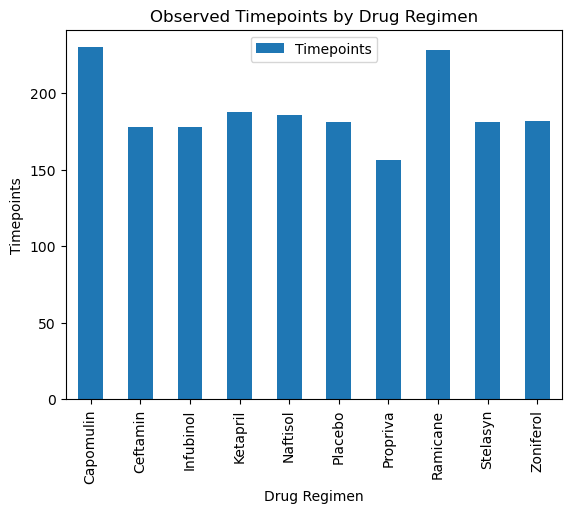

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) 
#for each drug regimen using Pandas.

#Do a count of observations (represented by Timepoints) by drug. Turn results into dataframe.
#https://bootcampspot.instructure.com/courses/4981/external_tools/313

count_df = deduped_merged_df.groupby(['Drug Regimen']).size().reset_index(name='Timepoints')

print(count_df)

# Plotting the bar graph
count_df.plot(x='Drug Regimen', y='Timepoints', kind='bar')

# Adding labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoints')
#plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Observed Timepoints by Drug Regimen")

plt.show()

  Drug Regimen  Timepoints
0    Capomulin         230
1     Ceftamin         178
2    Infubinol         178
3     Ketapril         188
4     Naftisol         186
5      Placebo         181
6     Propriva         156
7     Ramicane         228
8     Stelasyn         181
9    Zoniferol         182


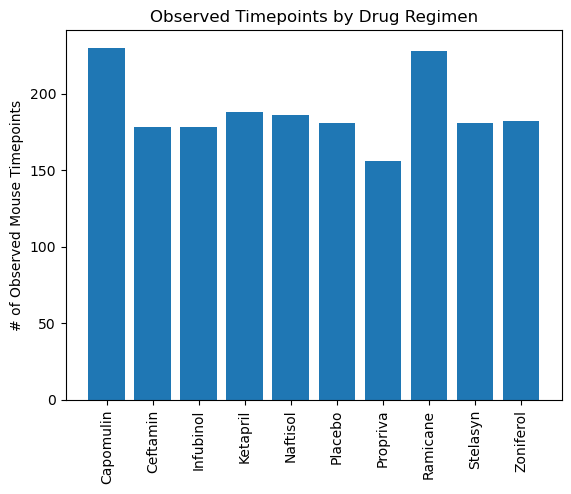

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen 
#using pyplot.

#Do a count of observations (represented by Timepoints) by drug and turn results into dataframe
#https://bootcampspot.instructure.com/courses/4981/external_tools/313
count_df = deduped_merged_df.groupby(['Drug Regimen']).size().reset_index(name='Timepoints')

print(count_df)

#Plot bar chart
x = count_df['Drug Regimen']
y = count_df['Timepoints']
plt.bar(x, y)
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Observed Timepoints by Drug Regimen")

# Rotate x-axis labels by 90 degrees
#https://bootcampspot.instructure.com/courses/4981/external_tools/313
plt.xticks(rotation=90)

plt.show()

      Sex  Mice
0  Female   124
1    Male   125


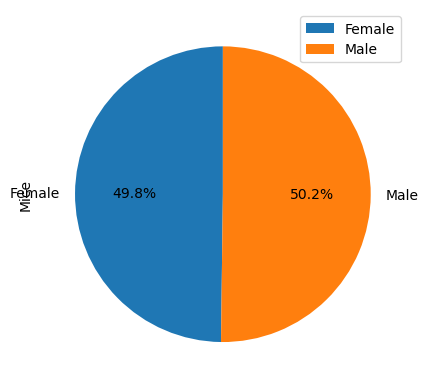

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#Define 'unique_counts_by_sex' to avoid name error
unique_count_by_sex = 0

# Count the number of unique Mice IDs by Sex
unique_counts_by_sex = deduped_merged_df.groupby('Sex')['Mouse ID'].nunique()

#https://bootcampspot.instructure.com/courses/4981/external_tools/313
#Convert unique_counts_by_sex to a DataFrame and rename the columns
df = pd.DataFrame({'Sex': unique_counts_by_sex.index, 'Mice': unique_counts_by_sex.values})

# Display the resulting table
print(df)

df.plot(kind='pie', y='Mice', labels=df['Sex'], autopct='%1.1f%%', startangle=90)

plt.show()

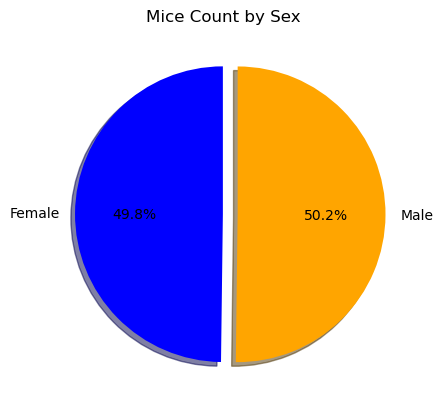

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Define pie chart components
sizes = df['Mice']
labels = df['Sex']
colors = ['blue', 'orange']
explode = [0, 0.1]

# Create pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90, shadow=True)

# Add title
plt.title('Mice Count by Sex')

# Display pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

#https://bootcampspot.instructure.com/courses/4981/external_tools/313
#Use .idmax function to identify the maximum timepoint per Mouse ID and drug regimen
#Use .isin function to specify which drug regimens to include in the output

#Get tumor volume for each mouse and drug regimen combo at maximum timepoint by using 
#loc function to filter DataFrame based on maximum timepoint 

#Step 1: Identify tumor volume for each mouse at maximum timepoint
final_tumor_volume = deduped_merged_df.loc[deduped_merged_df.groupby(['Mouse ID', 'Drug Regimen']\
)['Timepoint'].idxmax(), ['Mouse ID', 'Timepoint','Drug Regimen', 'Tumor Volume (mm3)']]
#final_tumor_volume.columns 
final_tumor_volume

#Check data types of fields in final_tumor_volume_filtered
#print(final_tumor_volume.dtypes)

#Convert 'Tumor Volume (mm3)' colum to numeric data type with pd.to_numeric() function
#from pandas library if necessary
#final_tumor_volume['Tumor Volume (mm3)'] = pd.to_numeric\
#(final_tumor_volume['Tumor Volume (mm3)'])

#Check if data is in dataframe
if isinstance(final_tumor_volume, pd.DataFrame):
    print("'final_tumor_volume' is a DataFrame")
else:
    print("'final_tumor_volume' is not a DataFrame")
    
#Step2
#Create filter that specifies which drug regimens to include in dataframe
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Step 3: Exclude any drug regimens not included in filter
final_tumor_volume_filtered =pd.DataFrame()
final_tumor_volume_filtered = final_tumor_volume[final_tumor_volume['Drug Regimen']\
.isin(drug_regimens)][['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]

final_tumor_volume_filtered

# Merge this group df with the original DataFrame to get the tumor volume at the 
#last timepoint

'final_tumor_volume' is a DataFrame


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
907,a203,Infubinol,45,67.973419
289,a251,Infubinol,45,65.525743
1487,a275,Ceftamin,45,62.999356
470,a411,Ramicane,45,38.407618
480,a444,Ramicane,45,43.047543
...,...,...,...,...
1374,y769,Ceftamin,45,68.594745
1814,y793,Capomulin,45,31.896238
1364,y865,Ceftamin,45,64.729837
646,z578,Ramicane,45,30.638696


In [18]:
#Convert final_tumor_volume into dataframe called final_obs_data_df
final_obs_data=pd.DataFrame()
final_obs_data = final_tumor_volume
final_obs_data_df = pd.DataFrame(final_obs_data)
#final_obs_data

# Get the data type of each column
column_types = final_obs_data_df.dtypes
#print(column_types)
final_obs_data_df.info()
final_obs_data_df

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 907 to 109
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            249 non-null    object 
 1   Timepoint           249 non-null    int64  
 2   Drug Regimen        249 non-null    object 
 3   Tumor Volume (mm3)  249 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.7+ KB


,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
907,a203,45,Infubinol,67.973419
289,a251,45,Infubinol,65.525743
1134,a262,45,Placebo,70.717621
1487,a275,45,Ceftamin,62.999356
736,a366,30,Stelasyn,63.440686
...,...,...,...,...
1566,z435,10,Propriva,48.710661
646,z578,45,Ramicane,30.638696
279,z581,45,Infubinol,62.754451
683,z795,45,Naftisol,65.741070


In [19]:
#Convert Tumor Volume (mm3) in final_obs_data_df to float
final_obs_data_df['Tumor Volume (mm3)'] = final_obs_data_df['Tumor Volume (mm3)'].astype(float)

print(final_obs_data_df.dtypes)

Mouse ID               object
Timepoint               int64
Drug Regimen           object
Tumor Volume (mm3)    float64
dtype: object


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol',\
'Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

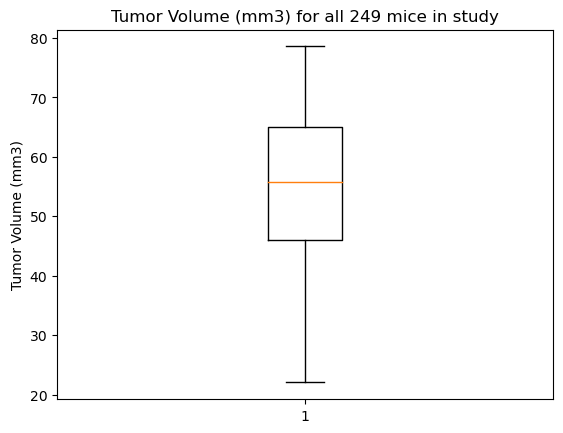

In [21]:
# If the data is in a dataframe, use pandas to give quartile calculations
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#final_obs_data_df

fig1, ax1 = plt.subplots()
#ax1.set_title('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(final_obs_data_df['Tumor Volume (mm3)'])
plt.title("Tumor Volume (mm3) for all 249 mice in study")
plt.show()

In [22]:
#Calculating quantiles wih dataframe is returning key errors on quartile parameters
#quartiles = tumor_vol.quantile([.25,.5,.75])
#lowerq = quartiles[.25]
#upperq = quartiles[.75]
#iqr = upperq-lowerq
#print(quartiles)

# Calculate quartiles using numpy instead
# with numpy method, lower quartile (Q1) stored at index 0 in quartiles array
# Median (Q2) stored at index 1 in quartiles array.
# Upper quartile (Q3) stored at index 2 in quartiles array
# Median stored at index 1 (50th percentile) in quartiles array

# https://bootcampspot.instructure.com/courses/4981/external_tools/313
# To ignore anything but float columns in data set, use select_dtypes() function 
# Below, only columns of type np.float64 will be evaluated in final_obs_data_df 
# Filtered float columns are passed to np.percentile() function to calculate quartiles
float_columns = final_obs_data_df.select_dtypes(include=np.float64)
quartiles = np.percentile(float_columns, [25, 50, 75])
lowerq = quartiles[0]
upperq = quartiles[2]
iqr = upperq - lowerq

print(quartiles)
#quartile results: [45.93471217 55.84141007 64.95756185]

[45.93471217 55.84141007 64.95756185]


In [23]:
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[1]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 45.93471217
The upper quartile of tumor volume is: 64.95756185
The interquartile range of tumor volume is: 19.022849680000007
The the median of tumor volume is: 55.84141007 
Values below 17.400437649999986 could be outliers.
Values above 93.49183637000002 could be outliers.


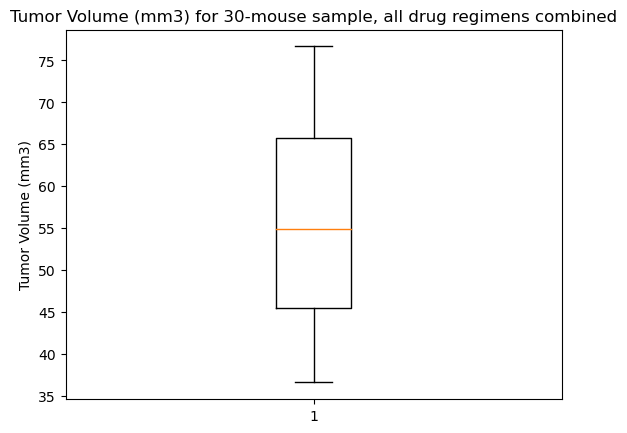

In [24]:
# Locate the rows which contain mice on each drug and get the tumor volumes
#final_obs_data_df
float_columns = final_obs_data_df.select_dtypes(include=np.float64)

# add subset 
subset = float_columns.sample(30)  

fig2, ax2 = plt.subplots()
#ax1.set_title('Drug Regimen')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.boxplot(subset['Tumor Volume (mm3)'])
plt.title("Tumor Volume (mm3) for 30-mouse sample, all drug regimens combined")
plt.show()

#print(subset)
#quartile results: [45.93471217 55.84141007 64.95756185]

In [25]:
quartiles = np.percentile(subset, [25, 50, 75])
lowerq = quartiles[0]
upperq = quartiles[2]
iqr = upperq - lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[1]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Create empty list to fill with tumor vol data (for plotting)
#tumor_vol

The lower quartile of tumor volume is: 45.4461337275
The upper quartile of tumor volume is: 65.744758555
The interquartile range of tumor volume is: 20.298624827500007
The the median of tumor volume is: 54.85593254 
Values below 14.998196486249988 could be outliers.
Values above 96.19269579625 could be outliers.


In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for
# each treatment group.

#list of treatments to loop through
treatments = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol',\
'Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']

# Create empty lists to hold data for drug regimen and tumor volume
regimen = []
volume = []

# Loop through outcomes data final_obs_data_df
#https://bootcampspot.instructure.com/courses/4981/external_tools/313
#iterrows() method iterates over rows of final_obs_data_df
#For each row, code checks if 'Drug Regimen' value is in treatments list. 
#If 'Drug Regimine' value is in treatment list, 'Drug Regimen' and 'Tumor Volume (mm3)' values 
#are appended to the regimen and volume lists

for index, row in final_obs_data_df.iterrows():
    if row['Drug Regimen'] in treatments:
        regimen.append(row['Drug Regimen'])
        volume.append(row['Tumor Volume (mm3)'])
    
# Create dictionary with column names and data
data = {"Drug Regimen": regimen,"Tumor Volume (mm3)": volume}
print(data)

# Create new DataFrame with column headers
outcomes_df = pd.DataFrame(data)
print(outcomes_df)

{'Drug Regimen': ['Infubinol', 'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ramicane', 'Ramicane', 'Ketapril', 'Stelasyn', 'Ramicane', 'Infubinol', 'Ramicane', 'Infubinol', 'Propriva', 'Zoniferol', 'Naftisol', 'Placebo', 'Stelasyn', 'Capomulin', 'Zoniferol', 'Ceftamin', 'Ceftamin', 'Naftisol', 'Capomulin', 'Ceftamin', 'Stelasyn', 'Infubinol', 'Zoniferol', 'Placebo', 'Zoniferol', 'Infubinol', 'Stelasyn', 'Ramicane', 'Zoniferol', 'Ketapril', 'Placebo', 'Ramicane', 'Placebo', 'Ketapril', 'Ketapril', 'Infubinol', 'Propriva', 'Zoniferol', 'Zoniferol', 'Ramicane', 'Ketapril', 'Naftisol', 'Placebo', 'Naftisol', 'Infubinol', 'Naftisol', 'Ramicane', 'Zoniferol', 'Stelasyn', 'Ketapril', 'Infubinol', 'Zoniferol', 'Ceftamin', 'Zoniferol', 'Ketapril', 'Capomulin', 'Naftisol', 'Ketapril', 'Capomulin', 'Zoniferol', 'Capomulin', 'Ketapril', 'Propriva', 'Propriva', 'Ramicane', 'Stelasyn', 'Propriva', 'Ketapril', 'Stelasyn', 'Ketapril', 'Ceftamin', 'Ramicane', 'Ramicane', 'Infubinol', '

In [27]:
# Generate the plot data for each sample 
#means 
#standard_errors 
#x_axis 

# Group data by 'Drug Regimen' and calculate mean and std of each 'Tumor Volume (mm3)' value
mean_outcomes = outcomes_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
standard_errors = outcomes_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

#Create DataFrame from output of groupby functions
#Use pd.DataFrame() function with the zip() function to combine data from mean_outcomes.index, 
#mean_outcomes, and standard_errors. Columns parameter specifies column names.
#https://bootcampspot.instructure.com/courses/4981/external_tools/313
concat_df = pd.DataFrame(list(zip(mean_outcomes.index, mean_outcomes, standard_errors)),\
columns=['Drug Regimen', 'Mean Tumor Volume', 'Standard Error'])

# Add column header to index to avoid x and y values with different lengths when plotting
# Use rename_axis() method with axis='index' parameter to add column header 'index' to existing 
#index of DataFrame without adding another index
#https://bootcampspot.instructure.com/courses/4981/external_tools/313
concat_df = concat_df.rename_axis('index', axis='index')

# Print the merged DataFrame
print(concat_df)

      Drug Regimen  Mean Tumor Volume  Standard Error
index                                                
0        Capomulin          36.667568        1.143038
1         Ceftamin          57.753977        1.673114
2        Infubinol          58.178246        1.720591
3         Ketapril          62.806191        1.989184
4         Naftisol          61.205757        2.059417
5          Placebo          60.508414        1.774934
6         Propriva          56.736964        1.665521
7         Ramicane          36.191390        1.134308
8         Stelasyn          61.001707        1.940056
9        Zoniferol          59.181258        1.753420


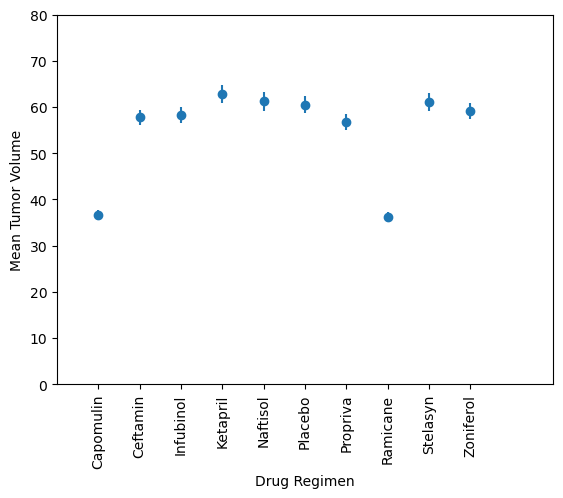

In [28]:
#x_axis = np.arange(0, len(concat_df), 1) + 1
x_axis = concat_df['Drug Regimen'].tolist()

fig, ax = plt.subplots()

# Set the x and y limits
ax.set_xlim(-1, 11)
ax.set_ylim(0, 80)

#Use tolist() method to convert DataFrame columns to lists that can become arguments 
#in ax.errorbar() function to plot error bars
#https://bootcampspot.instructure.com/courses/4981/external_tools/313
mean_tumor_volume_list = concat_df['Mean Tumor Volume'].tolist()
standard_error_list = concat_df['Standard Error'].tolist()

ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Mean Tumor Volume")

# Plot the errorbar
ax.errorbar(x_axis, mean_tumor_volume_list, standard_error_list, fmt="o")

# Rotate x-axis labels by 90 degrees
#https://bootcampspot.instructure.com/courses/4981/external_tools/313
plt.xticks(rotation=90)
plt.show()


## Line and Scatter Plots

<IPython.core.display.Javascript object>


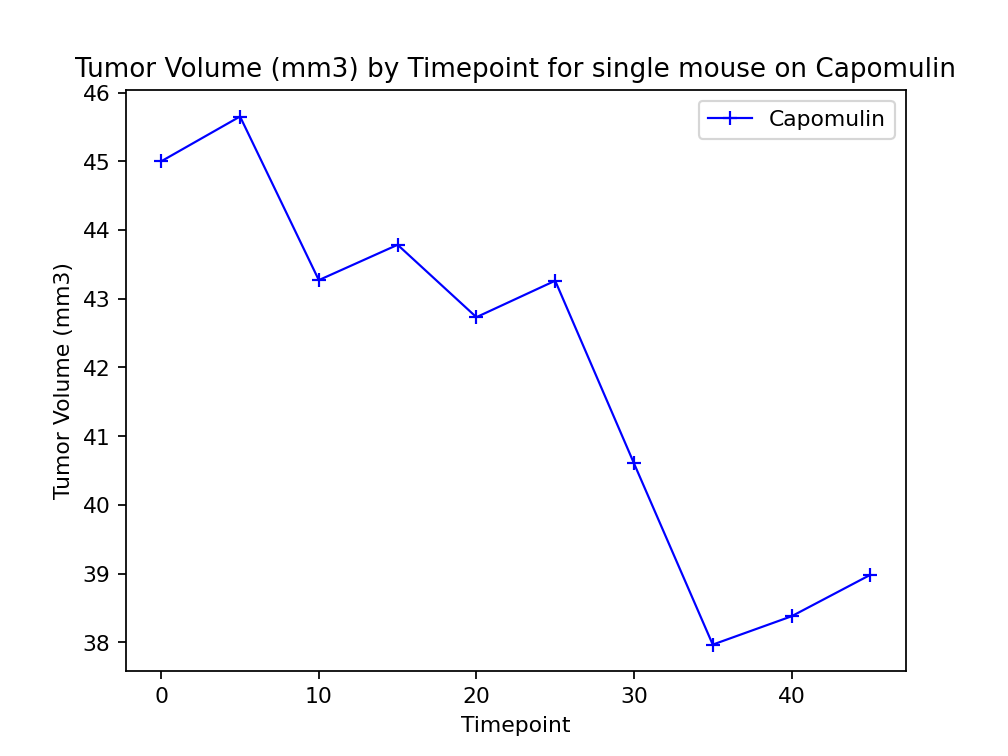

In [29]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#capo_mice=deduped_merged_df.loc[deduped_merged_df['Drug Regimen']=='Capomulin'& ['Mouse ID']=='b128']
#capo_mice
capo_mouse = deduped_merged_df.loc[(deduped_merged_df['Drug Regimen'] == 'Capomulin') & (deduped_merged_df['Mouse ID'] == 'b128')]
#print(capo_mouse)

%matplotlib notebook

x_axis = capo_mouse["Timepoint"].tolist()
y_axis = capo_mouse["Tumor Volume (mm3)"].tolist()

#print(x_axis)
#print(y_axis)

tumor_volume, = plt.plot(x_axis,y_axis, marker="+",color="blue", linewidth=1, label="Capomulin")
plt.legend()
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume (mm3) by Timepoint for single mouse on Capomulin")
plt.show()

In [30]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire 
# Capomulin regimen

#To get Capomulin average observed tumor volume
#https://bootcampspot.instructure.com/courses/4981/external_tools/313
mean_tumor = deduped_merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
capomulin_value = mean_tumor.loc['Capomulin']
#capomulin_value

#To get weights of mice on Capomulin
cap_mice = deduped_merged_df[deduped_merged_df['Drug Regimen'] == 'Capomulin']
cap_mice_weights = cap_mice['Weight (g)']
#print(cap_mice_weights)                             

#Turn series into Dataframe to add Mean Weight column
#Add Mean Weight column with all values = capomulin_value
cap_mice_weights_df=pd.DataFrame({'Weight (g)': cap_mice_weights, 'Mean Capomulin Tumor Volume':capomulin_value})
print(cap_mice_weights_df)

      Weight (g)  Mean Capomulin Tumor Volume
0             22                    40.675741
1             22                    40.675741
2             22                    40.675741
3             22                    40.675741
4             22                    40.675741
...          ...                          ...
1888          17                    40.675741
1889          17                    40.675741
1890          17                    40.675741
1891          17                    40.675741
1892          17                    40.675741

[230 rows x 2 columns]


<IPython.core.display.Javascript object>


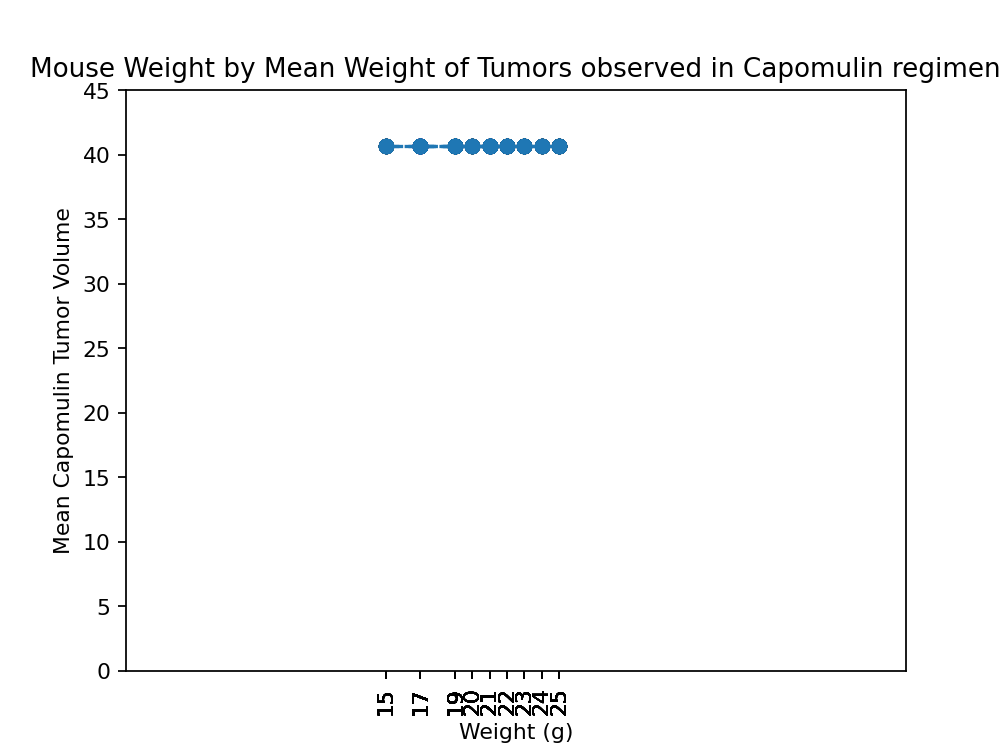

In [31]:
#Define scatter plot
fig, ax = plt.subplots()
x = cap_mice_weights_df['Weight (g)']
y = cap_mice_weights_df['Mean Capomulin Tumor Volume']
plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black")
plt.ylim(0,45)
plt.xlim(0,45)
plt.title("Mouse Weight by Mean Weight of Tumors observed in Capomulin regimen")
plt.xlabel("Individual Mouse Weight (g)")
plt.ylabel("Mean Weight (g) of Tumors observed in Capomulin regimen")
plt.ylabel('Mean Weight (g) of Tumors observed in Capomulin regimen', rotation=90)
plt.show()

## Correlation and Regression

In [32]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


In [33]:
from scipy import stats

# Extract'Weight (g)' and 'Mean Capomulin Tumor Volume' columns as data arrays from cap_mice_weights_df
weight = cap_mice_weights_df['Weight (g)'].values
volume = cap_mice_weights_df['Mean Capomulin Tumor Volume'].values

slope, int, r_value, p_value, std_err = stats.linregress(weight, volume)
fit = slope * weight + int

# Plot the linear model on top of scatter plot 
plt.scatter(weight,volume)
plt.plot(weight,fit,"--")
plt.xticks(weight, rotation=90)
plt.xlabel('Weight (g)')
plt.ylabel('Mean Capomulin Tumor Volume')
plt.show()

correlation_coefficient = r_value
print(correlation_coefficient)

0.0
